Exploring Data

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from scipy.linalg import svd

filepath=r"/Users/davidmiles-skov/Desktop/Academics/Machine Learning/02450 - Introduction to Machine Learning and Data Mining/Project 1/introML/data/processed_cleveland.data"
col_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang","oldpeak", "slope","ca","thal","num"]
cleveland_data = pd.read_csv(filepath,names =col_names, delimiter=",")

In [13]:
cleveland_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Cleaning up dataframe

In [16]:
print(cleveland_data.to_string())

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca thal  num
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0  0.0  6.0    0
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0  3.0  3.0    2
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0  2.0  7.0    1
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0  0.0  3.0    0
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0  0.0  3.0    0
5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8    1.0  0.0  3.0    0
6    62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6    3.0  2.0  3.0    3
7    57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6    1.0  0.0  3.0    0
8    63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4    2.0  1.0  7.0    2
9    53.0  1.0  4.0 

Only obvious issue is that "?" beeds to be replaced by "NaN" in columns of "ca" and "thal" (only columns with missing values according to description of data).

In [19]:
cleveland_data.thal=cleveland_data.thal.str.replace("?", "NaN")
cleveland_data.ca=cleveland_data.ca.str.replace("?", "NaN")

Checking for Missing values

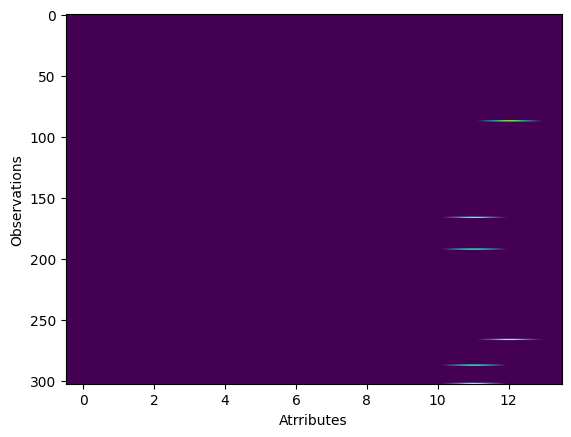

In [23]:
data = np.array(cleveland_data.values, dtype=np.float64)
missing_idx = np.isnan(data)
plt.imshow(missing_idx, aspect='auto')
plt.ylabel("Observations")
plt.xlabel("Atrributes")
plt.show()

In [26]:
print(data)

[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  2.]
 [67.  1.  4. ...  2.  7.  1.]
 ...
 [57.  1.  4. ...  1.  7.  3.]
 [57.  0.  2. ...  1.  3.  1.]
 [38.  1.  3. ... nan  3.  0.]]


Dropping observations with missing values

(303, 14)
(297, 14)


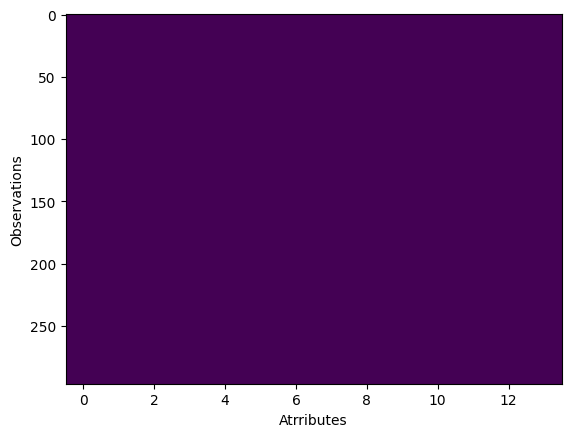

In [25]:
obs_w_missing = np.sum(missing_idx, 1) > 0
data_drop_missing_obs = data[np.logical_not(obs_w_missing), :]
print(data.shape)
print(data_drop_missing_obs.shape)
missing_idx_2 = np.isnan(data_drop_missing_obs)
plt.imshow(missing_idx_2, aspect='auto')
plt.ylabel("Observations")
plt.xlabel("Atrributes")
plt.show()

In [27]:
print(data_drop_missing_obs)

[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  2.]
 [67.  1.  4. ...  2.  7.  1.]
 ...
 [68.  1.  4. ...  2.  7.  2.]
 [57.  1.  4. ...  1.  7.  3.]
 [57.  0.  2. ...  1.  3.  1.]]


Lost 6 observations due to missing data

Performing PCA

Retrieving all continuous data and plotting thalach against chol.

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


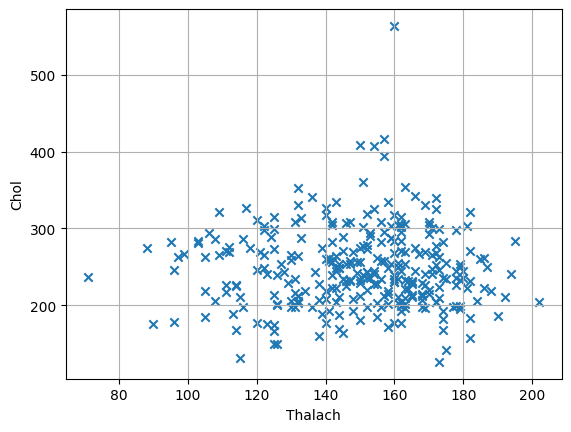

In [30]:
continuous_idx = np.array([0, 3, 4, 7, 9])
print([col_names[i] for i in continuous_idx])

thalach = data_drop_missing_obs[:, 7]
chol = data_drop_missing_obs[:, 4]
plt.scatter(thalach, chol, marker="x")
plt.xlabel("Thalach")
plt.ylabel("Chol")
plt.grid()
plt.show()

In [39]:
X = data_drop_missing_obs[:, continuous_idx]
y = data_drop_missing_obs[:, -1]
print(X.shape, y.shape)
N, M = X.shape[0], X.shape[1]
C = 

(297, 5) (297,)


1. Standardising data


In [47]:
X_s = (X - np.ones((N, 1))*X.mean(axis=0))/X.std(axis=0)
X_s.shape

(297, 5)

2. Computing SVD

In [48]:
U, S, V = svd(X_s, full_matrices=False)
rho = (S * S) / (S * S).sum()

print(rho)

[0.35937581 0.21941782 0.1741138  0.15313121 0.09396136]


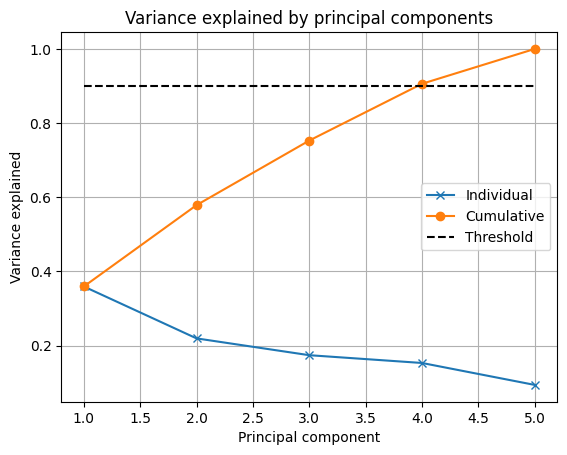

In [50]:
threshold=0.9
# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()